In [54]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [55]:
from sklearn.datasets import load_iris
load_iris = load_iris()

In [72]:
FEATURE_NAMES = [
    'sepal length (cm)', 
    'sepal width (cm)', 
    'petal length (cm)',
    'petal width (cm)']

TARGET_NAME = 'target'

In [62]:
dict_to_replace = {i: value for i, value in enumerate(load_iris.target_names.tolist())}

In [64]:
data = pd.DataFrame(load_iris.data, columns = load_iris.feature_names)
data['target'] = load_iris.target
data['target'] = data['target'].map(dict_to_replace)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [65]:
# data_sepal = data[['sepal length (cm)', 'sepal width (cm)']]
# data_sepal

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

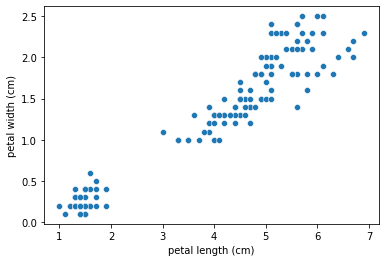

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=data, x='petal length (cm)', y='petal width (cm)')

**Видно, что данные очень хорошо коррелируют**

Мы бы хотели вместо длины и ширины чашелистика использовать какую-нибудь одну величину для обозначения их размера.

Метод гланых компонент может выбирать и нумеровать оси новой системы координат в порядке убывания дисперсии.*
1. В качестве первой оси (первой главной компоненты) выбирается ось, вдоль которой дисперсия данных максимальна. 
2. В качестве второй оси (второй главной компоненты) выбирается ось, дисперсия данных вдоль которой на втором месте по убыванию.
3. ...

$$\sum_{i=1}^{m}\big|\big|x_i - a_1 \cdot (a_1, x_i)\big|\big| ^2 \rightarrow min $$

где:
- $a_1 \cdot (a_1, x_i)$ — проекция вектора $x_i$ на направление $a_{1}$

*<em>[Можно показать](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82), что этот подход построения осей полностью совпадает с построением гиперплоскости (прямой в двумерном пространстве) методом наименьших квадратов (обычной линейной регрессии). </em>

$$D_{вдоль \; a_k} = \frac{1}{m} \sum_{i=1}^{m}(a_k, x_k)^2$$

# PCA

In [73]:
data_train, data_test = train_test_split(data, test_size=0.3)

In [74]:
pca_object = PCA(n_components=2)

In [75]:
pca_object.fit(data_train[FEATURE_NAMES])

PCA(n_components=2)

In [76]:
data_train[['PCA_1', 'PCA_2']] = pca_object.transform(data_train[FEATURE_NAMES])

In [77]:
data_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,PCA_1,PCA_2
63,6.1,2.9,4.7,1.4,versicolor,0.875526,-0.136620
98,5.1,2.5,3.0,1.1,versicolor,-1.027882,-0.724458
115,6.4,3.2,5.3,2.3,virginica,1.800359,0.086984
142,5.8,2.7,5.1,1.9,virginica,1.297877,-0.598652
119,6.0,2.2,5.0,1.5,virginica,1.178407,-0.770293
...,...,...,...,...,...,...,...
25,5.0,3.0,1.6,0.2,setosa,-2.616540,-0.083685
36,5.5,3.5,1.3,0.2,setosa,-2.721129,0.666724
18,5.7,3.8,1.7,0.3,setosa,-2.290060,0.925918
17,5.1,3.5,1.4,0.3,setosa,-2.748819,0.371821


<AxesSubplot:xlabel='PCA_1', ylabel='PCA_2'>

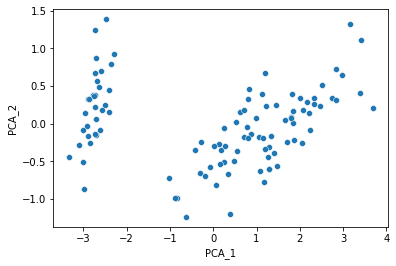

In [78]:
sns.scatterplot(data=data_train, x='PCA_1', y='PCA_2')

In [80]:
pca_object.explained_variance_ratio_

array([0.91792265, 0.0600719 ])